# Hierarchical Clustering Demonstration

This notebook demonstrates how to use the hierarchical clustering algorithm to cluster data points.

## Import Required Libraries

Import the necessary libraries including matplotlib, numpy, pandas, and scipy.

In [1]:
# Import the required libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage

## Load and Prepare Data

Load the social media and exercise dataset for clustering analysis.

In [2]:
# Define the colors to be used in the plot.
colors = [
    "#2580B7", # Blue
    "#F59B11", # Yellow
    "#C03B26", # Red
    "#44546A", # Gray
]

# Seed for reproducibility.
np.random.seed(42)

# Load the data.
df = pd.read_csv("./data/social_media_exercise.csv")

## Apply Agglomerative Clustering

Perform agglomerative hierarchical clustering on the dataset.

In [3]:
# Agglomerative Clustering.
agg_cluster = AgglomerativeClustering(metric="euclidean", linkage="single")
df["agg_cluster"] = agg_cluster.fit_predict(
    df[["social_media", "physical_exercise"]]
)

## Visualize Clustering Results

Plot the agglomerative clustering results with labeled data points.

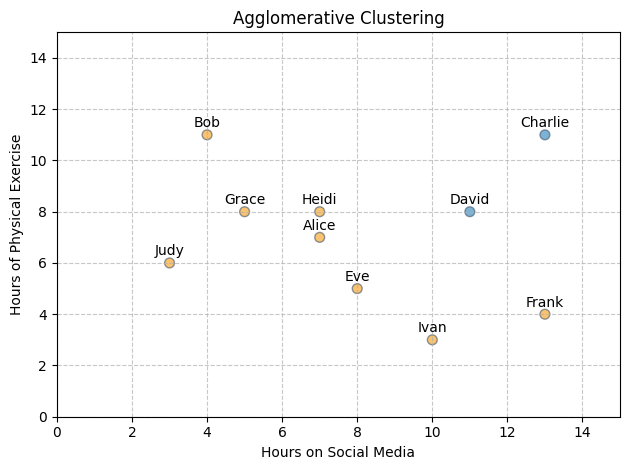

In [4]:
# Agglomerative Clustering Plot.
plt.scatter(
    df["social_media"], df["physical_exercise"],
    c=[colors[color] for color in df["agg_cluster"]],
    s=50, edgecolor=colors[-1], alpha=0.6
)

# Annotate the points with the names.
for i, name in enumerate(df["name"]):
    plt.annotate(
        name,
        (df["social_media"][i], df["physical_exercise"][i] + 0.3), ha="center"
    )

# Plot information.
plt.title("Agglomerative Clustering")
plt.xlabel("Hours on Social Media")
plt.ylabel("Hours of Physical Exercise")
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 15)
plt.ylim(0, 15)

plt.tight_layout()
plt.show()

## Create Dendrogram

Generate a dendrogram to visualize the hierarchical clustering structure.

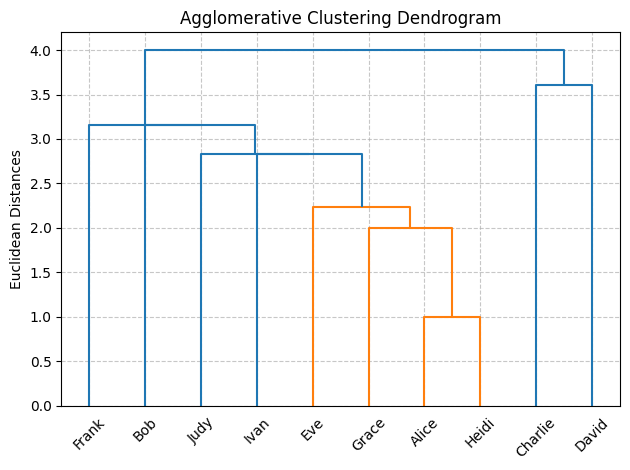

In [5]:
# Dendrogram for Agglomerative Clustering.
# Perform hierarchical/agglomerative clustering.
Z = linkage(df[["social_media", "physical_exercise"]], method="single")

# Plot the dendrogram
dendrogram(
    Z, labels=df["name"].values,
    distance_sort="ascending", show_leaf_counts=True
)

plt.title("Agglomerative Clustering Dendrogram")
plt.ylabel("Euclidean Distances")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tick_params(axis="x", rotation=45, labelsize=10)

plt.tight_layout()
plt.show()